In [1]:
import numpy as np
import matplotlib.pyplot as plt
import euclid_windows as EW

In [2]:
Win = EW.Windows(bintype="equipopulated",normalize=False)
Win.get_distributions()

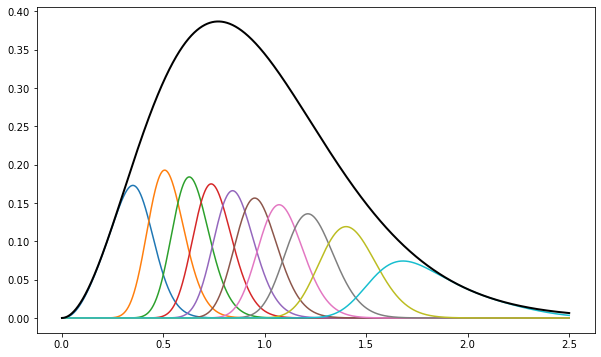

In [3]:
plt.figure(figsize=(10,6))
for i in range(10):
    plt.plot(Win.zeta,Win.eta_z[i])
plt.plot(Win.zeta,Win.gal_dist,'k',lw=2)

In [4]:
import camb
from camb import model
from camb.sources import SplinedSourceWindow

In [5]:
#This is just copied from Marina's script
lmax = 300

pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(As=2e-9, ns=0.965)
pars.set_for_lmax(lmax, lens_potential_accuracy=1)
pars.SourceTerms.counts_redshift = False
pars.SourceTerms.counts_lensing = False
pars.SourceTerms.limber_windows = True
pars.SourceTerms.limber_phi_lmin = 50
pars.SourceTerms.counts_velocity = False
pars.SourceTerms.counts_radial = False
pars.SourceTerms.counts_timedelay = False
pars.SourceTerms.counts_ISW = False
pars.SourceTerms.counts_potential = False
pars.SourceTerms.counts_evolve = True
pars.SourceTerms.line_phot_dipole = False
pars.SourceTerms.line_phot_quadrupole = False
pars.SourceTerms.line_basic = True
pars.SourceTerms.line_distortions = False
pars.SourceTerms.line_extra = False
pars.SourceTerms.line_reionization = False
pars.SourceTerms.use_21cm_mK = False

pars.Want_CMB = True 

pars.NonLinear = model.NonLinear_both

In [6]:
pars.SourceWindows = Win.get_camb_distributions()                          
results = camb.get_results(pars)
cls = results.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

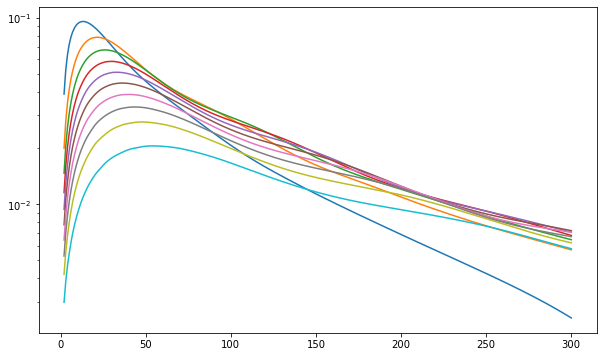

In [7]:
ell= np.arange(2, lmax+1)
plt.figure(figsize=(10,6))
for i in np.arange(10)+1:
    plt.plot(ell,cls['TxW'+str(i)][2:lmax+1])
plt.yscale('log')